<div style="text-align:center">
    <h1>
        On-policy Monte Carlo Control
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to implement one of the two major strategies that exist when learning a policy by interacting with the environment, called on-policy learning. The agent will perform the task from start to finish and based on the sample experience generated, update its estimates of the q-values of each state-action pair $Q(s,a)$.
    </p>
</div>


## Import the necessary software libraries:

In [ ]:
!pip install setuptools==65.5.0
!pip install gym==0.21.0
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install pyglet==1.5.27
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Initialize the environment

In [ ]:
env = Maze()

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

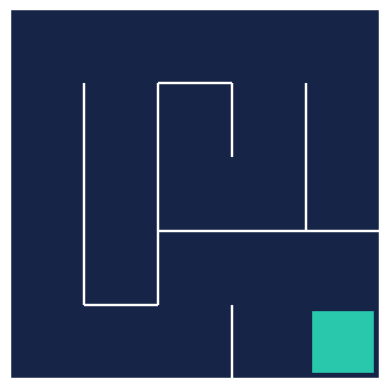

In [ ]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [ ]:
action_values = np.zeros(shape=(5, 5, 4))

#### Plot $Q(s, a)$

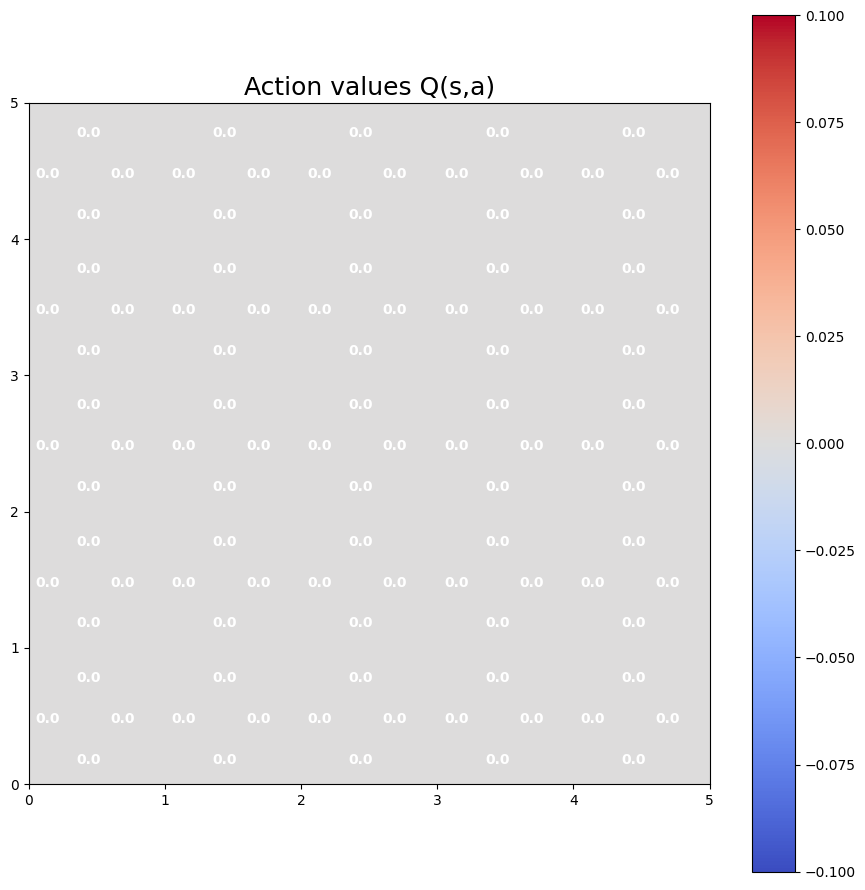

In [ ]:
plot_action_values(action_values)

## Define the policy $\pi(s)$

#### Create the policy $\pi(s)$

In [ ]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max())) 

#### Test the policy with state (0, 0)

In [ ]:
action = policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


#### Plot the policy

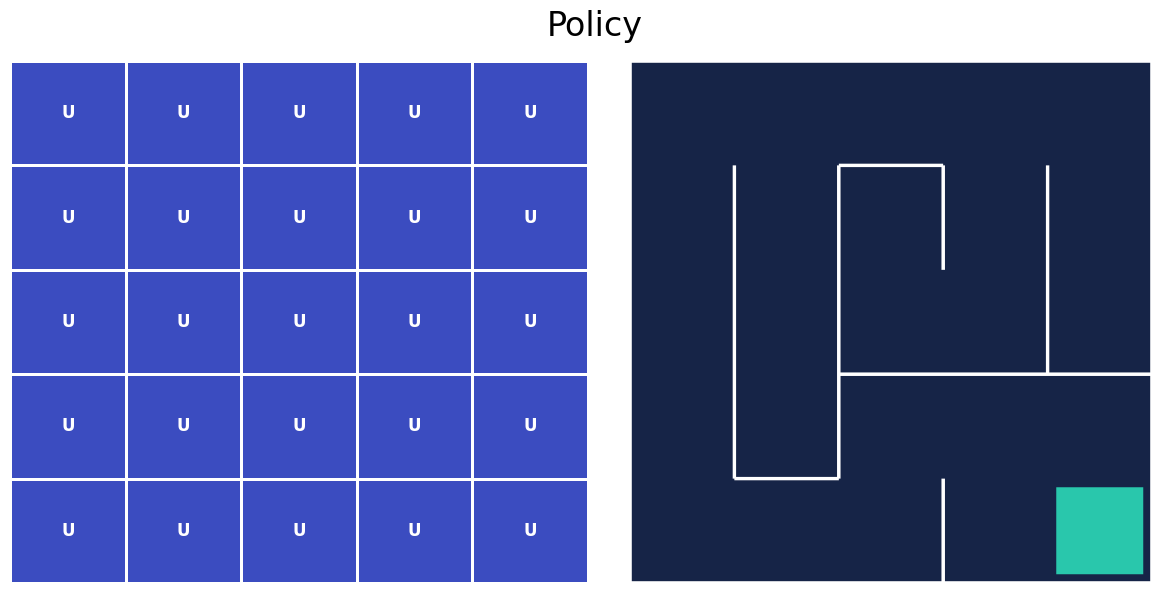

In [ ]:
plot_policy(action_values, frame)

## Implement the algorithm


</br></br></br>

![Screenshot%202021-02-17%20at%2011.00.29.png](attachment:Screenshot%202021-02-17%20at%2011.00.29.png)


<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [ ]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
    
    sa_returns = {}
    
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
        
        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            
            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])
            

In [ ]:
on_policy_mc_control(policy, action_values, episodes=10000)

## Show results

#### Show resulting value table $Q(s, a)$

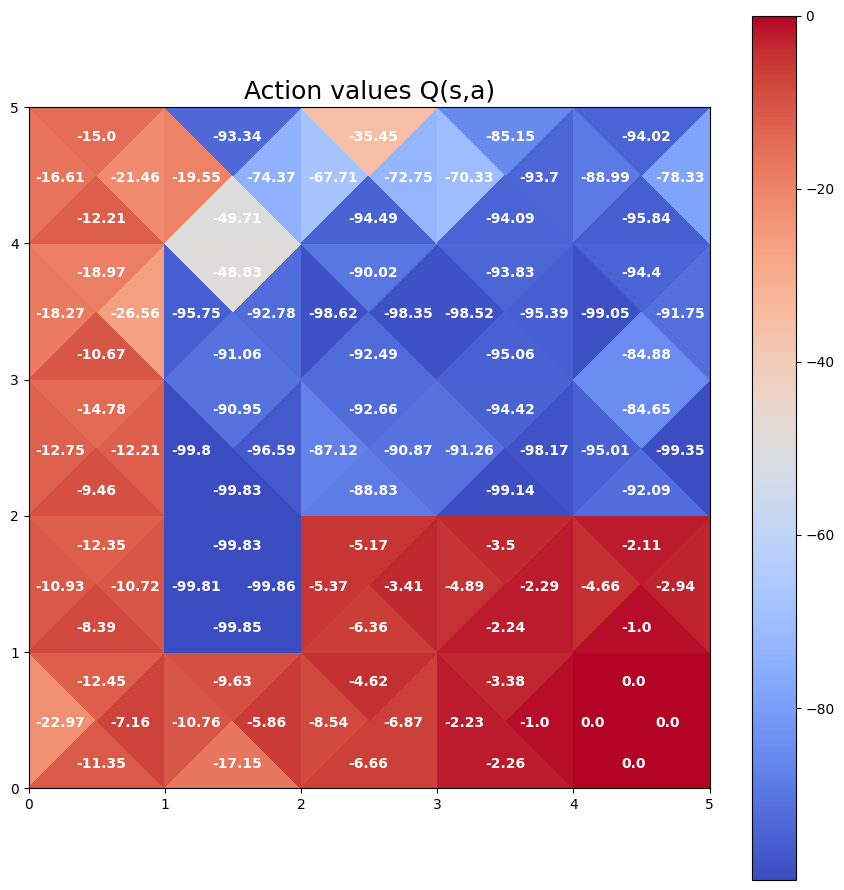

In [ ]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

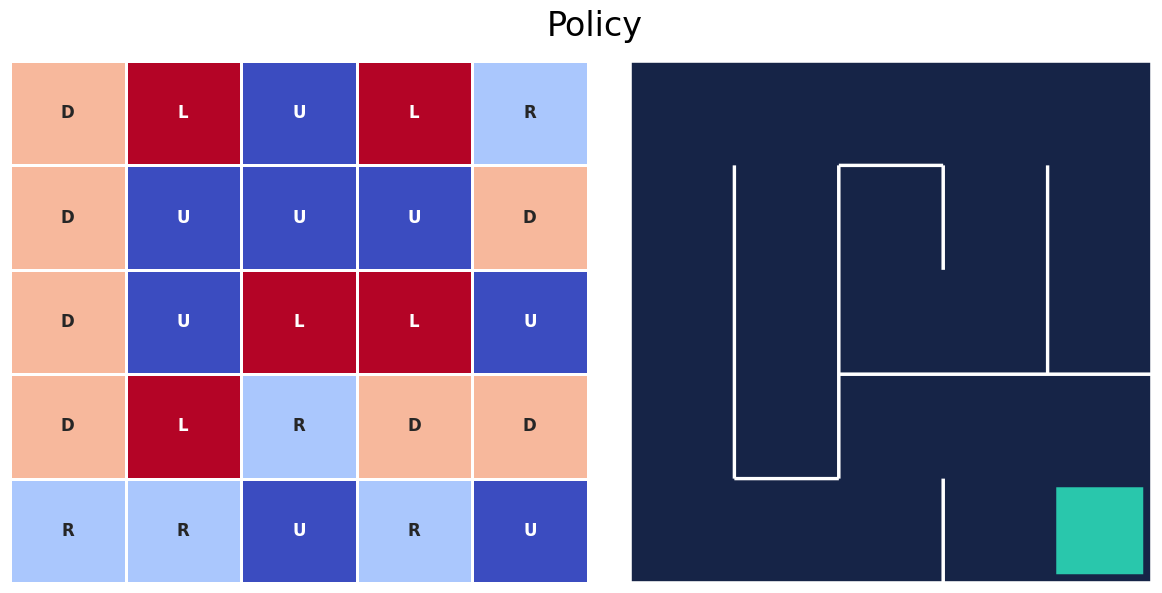

In [ ]:
plot_policy(action_values, frame)

#### Test the resulting agent

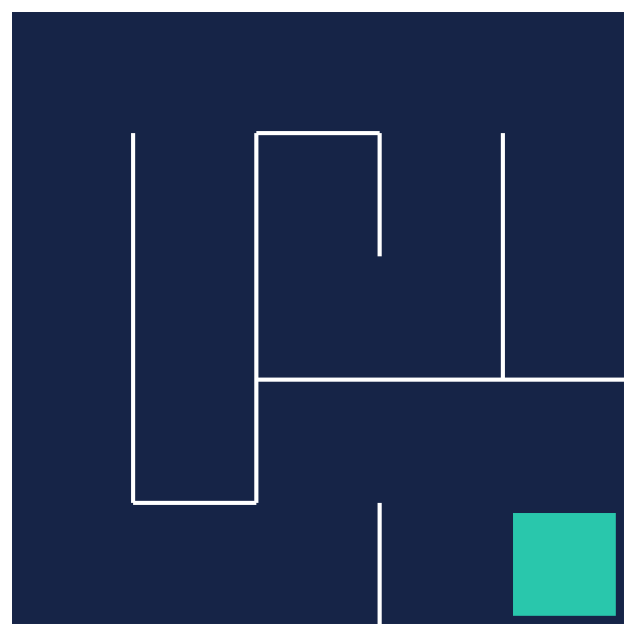

In [ ]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)